# 数学基本运算与运算符

- 数学运算的常规分类是：
    1. 基本运算：
        - 算术运算
        - 比较运算
        - 逻辑运算
        - 位运算
        - 符合运算
        - 其他运算
    2. 指数与对数运算
    3. 三角函数运算
    4. 双曲函数运算
    5. 角度与弧度运算

- 在一般应用中，我们更加关注的是向量运算的定义：
    - 按向量的分量运算；
    - 非按向量的分量运算；

## 运算符与基本运算

### 四则运算

#### 加减运算

1. `__add__(self, value, /)`
2. `__sub__(self, value, /)`
3. `__neg__(self, /)`


In [ ]:
import torch

t1 = torch.Tensor(
    [
        [1, 2, 3],
        [3, 4, 5]
    ]
)

t2 = torch.Tensor(
    [
        [9, 8, 7],
        [6, 5, 4]
    ]
)

print(t1 + t2)
print(t1 - t2)
print(- t2)
# print(+t2)    # 这个运算符是没有第

#### 乘除运算

1. `__matmul__(self, value, /)`
    - 矩阵乘法：内积：点击`@`
2. `__mul__(self, value, /)`
    - 按位乘法：`*`
3. `__truediv__(self, value, /)`
    - 浮点除
4. `__floordiv__(self, other)`
    - 整除
5. `__mod__(self, value, /)`
    - 求余
---
6. `__div__(self, value, /)`
    - 早期的除法python2.0支持的重载运算符
---
- 注意：
    - 上面的运算除内积外，在向量中还有一种运算是数乘。

In [ ]:
import torch

t1 = torch.Tensor(
    [
        [1, 2, 3],
        [3, 4, 5]
    ]
)

t2 = torch.Tensor(
    [
        [9, 8, 7],
        [6, 5, 4]
    ]
)

print(t1 * t2)
print(t1 / t2)
print(t1 % t2)
print(t1 // t2)   # 整除

print(t1 @ t2.t())    # 内积

In [ ]:
# 数乘的例子
import torch

t1 = torch.Tensor(
    [
        [1, 2, 3],
        [3, 4, 5]
    ]
)


print(t1 * 2)
print(t1 / 2)
print(t1 % 2)
print(t1 // 3)   # 整除

# 内积内有数乘

- 算术运算存在左乘与右乘
    - 上面运算左右都行，因为：
        1. `__radd__(self, value, /)`
        2. `__rsub__(self, value, /)`
        3. `__rmul__(self, value, /)`
        4. `__rtruediv__(self, value, /)`
        5. `__rfloordiv__(self, value, /)`
        6. `__rmod__(self, value, /)`
        7. `__rdivmod__(self, value, /)`   : 这个运算符是：divmod返回商与余数


#### 幂运算

- `__rpow__(self, other)`
- `__pow__(self, other)`

In [ ]:
import torch

t1 = torch.Tensor(
    [
        [1, 2, 3],
        [3, 4, 5]
    ]
)
t2 = torch.Tensor(
    [
        [9, 8, 7],
        [6, 5, 4]
    ]
)
print(t2 ** t1)  # 按位叉乘
print(t1 ** 2)   # 数乘

#### 绝对值运算

- `__abs__(self, /)`

In [ ]:
import torch

t1 = torch.Tensor(
    [
        [-1, 2, -3],
        [3, -4, 5]
    ]
)
print(t1.abs())
#  print(| t1 |)  绝对值没有| | 这个符号

#### 四则运算的四个版本


1. 版本一：
    - 运算符： + 
2. 版本二：
    - 成员函数： add
3. 版本三：
    - 替换修改函数 ：add_
4. 版本四：
    - 全局函数：torch.add


----
- 注意：
    - 某些运算符的成员函数或者全局函数没有实现，比如truediv没有，代替的是div。
    - 具体支持哪个版本在查看运算符的时候，文档会有说明。
    - 下面与运算符有关的依次类推。

In [ ]:
import torch

t1 = torch.Tensor(
    [
        [1, 2, 3],
        [3, 4, 5]
    ]
)
t2 = torch.Tensor(
    [
        [9, 8, 7],
        [6, 5, 4]
    ]
)
print(t1 + t2)
print(t1.add(t2))
print(t1.add_(t2))
print(torch.add(t1, t2))

### 比较运算

1. `__lt__`
2. `__le__`
3. `__gt__`
4. `__ge__`
5. `__eq__`
6. `__ne__`

----
- 提示：
   - 运算符版
   - 成员函数的两个版本：lt与lt_
   - 全局函数版本：torch.lt
   
   - 记得向量运算：
       - 向量与向量
       - 向量与标量

In [ ]:
import torch

t1 = torch.Tensor(
    [
        [1, 2, 3],
        [3, 4, 5]
    ]
)
t2 = torch.Tensor(
    [
        [9, 8, 7],
        [6, 5, 4]
    ]
)

print(t1 > t2)
print(t1.gt(t2))
print(torch.gt(t1,  t2))
print(t1.gt_(t2))     # 保留了原来浮点数的风格

In [ ]:
# 向量  与 标量
import torch

t1 = torch.Tensor(
    [
        [1, 2, 3],
        [3, 4, 5]
    ]
)
t2 = torch.Tensor(
    [
        [9, 8, 7],
        [6, 5, 4]
    ]
)

print(t1 > 2)
print(t1.gt(2))
print(torch.gt(t1,  2))    # 第一个必须是Tensor
print(t1.gt_(2))     # 保留了原来浮点数的风格

### 逻辑运算

- Tensor没有重载and，or，xor， not等四个逻辑运算，逻辑运算还是采用的是Python的标量运算

### 位运算

1. `__and__(self, value, /)`
2. `__or__(self, value, /)`
3. `__xor__(self, value, /)`
4. `__invert__(self, /)`

5. `__lshift__(self, value, /)`
6. `__rshift__(self, value, /)`
----


In [ ]:
# 向量  与 标量
import torch

t1 = torch.LongTensor(
    [
        [1, 2, 3],
        [3, 4, 5]
    ]
)

print(t1 & 1)    # and
print(t1 | 1)     # or
print(t1 ^ 1)   # xor
print(t1 >> 1)   # rshift
print(t1 << 1)   # lshift
print(~t1)       # invert

### 复合运算

- 所谓符合运算就是 += 这类运算，类似于成员函数带_下划线后缀。

----

1.  加减
    - `__iadd__(...)`
    - `__isub__(...)`
2. 乘除
    - `__itruediv__ = __idiv__(...)`
    - `__imul__(...)`
    - `__idiv__(...)`    # 兼容python2.0
3. 求幂
    - `__ipow__(self, other)`

4. 位算术
    - `__iand__(...)`
    - `__ior__(...)`
    - `__ixor__(...)`
5. 位移
    - `__ilshift__(...)`
    - `__irshift__(...)`
    
----
- 注意：
    - 求余是没有赋值复合的。

In [ ]:
# 注意：向量 与 向量       --  向量  与标量
import torch

t1 = torch.Tensor(
    [
        [1, 2, 3],
        [3, 4, 5]
    ]
)
t2 = torch.Tensor(
    [
        [9, 8, 7],
        [6, 5, 4]
    ]
)
t1 += t2
print(t1)
t1 -= t2
print(t1)
t1 *= t2
print(t1)
t1 //= t2
print(t1)
t1 /= t2
print(t1) 
# t1 **= t2    # 文档提供，但没有实现
# t1 **=2
t1 /= 2
print(t1)

### 其他运算

- 四舍五入：
    - round
    - max
    - min
    - all
    - any
    - mode：返回商与余数
    - sqrt
    - rsqrt : 平方根倒数
    - sign

## 指数与对数函数

- 在Python内置提供了指数函数，这里的指数函数是指自然指数。

### exp函数

1. `exp(input, out=None) -> Tensor`：$f(x) = e^{x}$
2. `expm1(input, out=None) -> Tensor`: $f(x) = e^{x} -1$
3. `exponential_(lambd=1, *, generator=None) -> Tensor`：$f(x) = \lambda e^{-\lambda x}$

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch

x = torch.linspace(-1, 1, 100)
y_1 = x.exp()
y_2 = x.expm1()

x_ = x.clone()
y_3 = x_.exponential_(lambd=1)     # λ=1 该函数与exp函数一样，但是这是一个随机分布函数，返回的满足随机取样
plt.figure("指数函数", figsize=(10, 10))
ax1 = plt.subplot(221)
ax1.plot(x, y_1, color=(1,0,0,1))
ax2 = plt.subplot(222)
ax2.plot(x, y_2, color=(1,1,0,1))
ax3 = plt.subplot(223)
ax3.plot(x, y_3, color=(1,0,1,1))
plt.show()

###  log函数

1. `log(input, out=None) -> Tensor`：$y_{i} = \log_{e} (x_{i})$
2. `log10(input, out=None) -> Tensor`：$y_{i} = \log_{10} (x_{i})$
3. `log2(input, out=None) -> Tensor`：$y_{i} = \log_{2} (x_{i})$
4. `log1p(input, out=None) -> Tensor`：$y_i = \log_{e} (x_i + 1)$
5. `log_normal_(mean=1, std=2, *, generator=None)`：$f(x) = \dfrac{1}{x \sigma \sqrt{2\pi}}\ e^{-\frac{(\ln x - \mu)^2}{2\sigma^2}}$：随机采样

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch

x = torch.linspace(-10, 10, 100)
y_1 = x.log()
y_2 = x.log2()
y_3 = x.log10()

y_4 = x.log1p()
x_ = x.clone()
y_5 = x_.log_normal_()

plt.figure("指数函数", figsize=(15, 10))
ax1 = plt.subplot(231)
ax1.plot(x, y_1, color=(1, 0, 0, 1))
ax2 = plt.subplot(232)
ax2.plot(x, y_2, color=(0, 1, 0, 1))
ax3 = plt.subplot(233)
ax3.plot(x, y_3, color=(0, 0, 1, 1))
ax4 = plt.subplot(234)
ax4.plot(x, y_4, color=(0, 1, 1, 1))
ax5 = plt.subplot(235)
ax5.plot(x, y_5, color=(1, 0, 1, 1))
plt.show()

## 三角函数运算

1. `sin() -> Tensor`与`sin_() -> Tensor`
2. `cos() -> Tensor`与`cos_() -> Tensor`
3. `tan() -> Tensor`与`tan_() -> Tensor`


---

4. `asin() -> Tensor`与`asin_() -> Tensor`
5. `acos() -> Tensor`与`acos_() -> Tensor`
6. `atan() -> Tensor`与`atan_() -> Tensor`
7. `atan2() -> Tensor`与`atan2_() -> Tensor`


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import math

x = torch.linspace(-2*math.pi, 2*math.pi, 100)
y_1 = x.sin()
y_2 = x.cos()
y_3 = x.tan()

plt.figure("指数函数", figsize=(15, 5))
ax1 = plt.subplot(131)
ax1.plot(x, y_1, color=(1, 0, 0, 1))
ax2 = plt.subplot(132)
ax2.plot(x, y_2, color=(0, 1, 0, 1))
ax3 = plt.subplot(133)
ax3.plot(x, y_3, color=(0, 0, 1, 1))

plt.show()

## 双曲函数运算

- 双曲函数表达式
    - 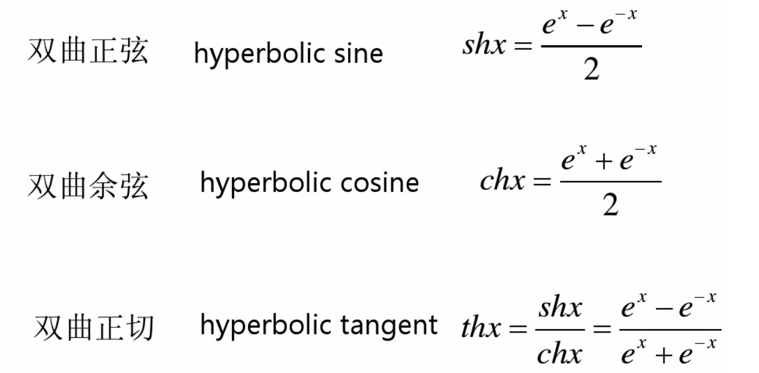

### 双曲正弦

1. `sinh_() -> Tensor`
2. `sinh() -> Tensor`

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import math

x = torch.linspace(-10, 10, 100)
y = x.sinh()
plt.plot(x, y, color=(1, 0, 0, 1))
plt.show()

### 双曲余弦

1. `cosh_() -> Tensor`
2. `cosh() -> Tensor`

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import math

x = torch.linspace(-10, 10, 100)
y = x.cosh()
plt.plot(x, y, color=(1, 0, 0, 1))
plt.show()

### 双曲正切
1. `tanh_() -> Tensor`
2. `tanh() -> Tensor`

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import math

x = torch.linspace(-10, 10, 100)
y = x.tanh()
plt.plot(x, y, color=(1, 0, 0, 1))
plt.show()

## 统计运算

### 求和函数与求阶乘

- `cumsum(dim, dtype=None) -> Tensor`
- `cumprod(dim, dtype=None) -> Tensor`
- `sum(dim=None, keepdim=False, dtype=None) -> Tensor`
- `sum_to_size(*size) -> Tensor`
- `prod(dim=None, keepdim=False, dtype=None) -> Tensor`

In [ ]:
import torch

t = torch.Tensor(
    [
        [1, 2, 3, 4],
        [3, 4, 5, 6]
    ]
)

print(t.cumsum(dim=0))   # 按照行累加
print(t.sum(dim=(), keepdim=True))
print(t.sum(dim=(1), keepdim=True))
print(t.sum(dim=(0), keepdim=True))
print(t.sum(dim=(1, 0), keepdim=True))
print('---------')
print(t.sum_to_size(2,1))   # 行不动，列按照求和合并为1
print(t.sum_to_size(1,4))   # 列不动，行按照求和合并为1
print(t.sum_to_size(1,1))   # 行列累加

### 均值函数

- `mean(dim=None, keepdim=False) -> Tensor or (Tensor, Tensor)`

In [ ]:
import torch

t = torch.Tensor(
    [
        [1, 2, 3, 4],
        [3, 4, 5, 6]
    ]
)
print(t.mean())
print(t.mean(1))
print(t.mean(dim=(1), keepdim=True))
print(t.mean(dim=(0), keepdim=False))

### 方差与标准差
- ` std(dim=None, unbiased=True, keepdim=False) -> Tensor`
    - unbiased：无偏与有偏方差
    - 标准差与方差的区别是多了一个平方根运算
- `var(dim=None, unbiased=True, keepdim=False) -> Tensor`

In [ ]:
import torch

t = torch.Tensor(
    [
        [1, 2, 3, 4],
        [3, 4, 5, 6]
    ]
)
print(t.std())
print(t.var())
print(t.std(unbiased=False))
print(t.var(unbiased=False))

### 误差函数
- 误差相关函数：
    - Y = erf(X)             Error function
    - Y = erfc(X)            Complementary error function（补误差函数）
    - Y = erfcx(X)           Scaled complementary error function
    - X = erfinv(Y)          Inverse error function(误差函数的反函数)
    - X = erfcinv(Y)         Inverse complementary error function（补误差函数的反函数）
- 函数公式：
    - $\mathrm{erf}(x) = \frac{2}{\sqrt{\pi}} \int_{0}^{x} e^{-t^2} dt$
    - $\text{erfc}(x)  = 1 - \text{erf}(x) $
    - $\text{erfcx} (x) = e^{x^2} \text{erf}$
        - 当x很大的时候：$\text{erfcx} \approx (\dfrac{1}{\sqrt{\pi}}) \dfrac{1}{x}$

1. `erf() -> Tensor`
2. `erfc() -> Tensor`
3. `erfinv() -> Tensor`

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import math

x = torch.linspace(-10, 10, 100)
y = x.erf()
plt.plot(x, y, color=(1, 0, 0, 1))
plt.plot(x, x.erfc(), color=(0, 0, 1, 1))
plt.show()

### 直方计数

1. `histc(bins=100, min=0, max=0) -> Tensor`
    - bins：直方统计的箱子数

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import math

t = torch.randint(low=0,  high=10, size=(100,), dtype=torch.float)
print(t)
h = t.histc(bins=5)   # 直方统计，分成多个段，每个段的数量
print(h)

plt.hist(t, bins=5, rwidth=0.5, color='red')
plt.show()

### 中值

- `median(dim=None, keepdim=False) -> (Tensor, LongTensor)`


In [ ]:
import torch

t = torch.Tensor(
    [
        [1, 2, 3, 4],
        [3, 4, 5, 6]
    ]
)

print(t.median())

### 最大值，最小值

1. `max(dim=None, keepdim=False) -> Tensor or (Tensor, Tensor)`
2. `min(dim=None, keepdim=False) -> Tensor or (Tensor, Tensor)`
3. `argmax(dim=None, keepdim=False) -> LongTensor`
4. `argmin(dim=None, keepdim=False) -> LongTensor`


In [ ]:
import torch

t = torch.Tensor(
    [
        [1, 2, 3, 4],
        [3, 4, 5, 6]
    ]
)
print(t.max())
print(t.min())
print(t.argmax())
print(t.argmax(dim=0))   # 按照行取最大值

# 线性代数运算

## 转置运算

- 2D维转置
    - `t() -> Tensor`
    - `t_() -> Tensor`

- 多维维数交换
    - `transpose(dim0, dim1) -> Tensor`
    - `transpose_(dim0, dim1) -> Tensor`

In [ ]:
import torch

t = torch.Tensor(
    [
        [1, 2, 3, 4],
        [3, 4, 5, 6]
    ]
)
print(t.t())
print(t.transpose(1, 0))

## 逆矩阵运算

- `inverse() -> Tensor`
    - 必须是方阵。

In [ ]:
import torch

t = torch.Tensor(
    [
        [1, 2, 3],
        [3, 4, 5],
        [5, 6, 7]
    ]
)
print(t.inverse())

## 行列式计算
- `det() -> Tensor`

In [ ]:
import torch

t = torch.Tensor(
    [
        [1, 2],
        [3, 4]
    ]
)
print(t.det())

## 特征分解计算

- `eig(eigenvectors=False) -> (Tensor, Tensor)`

In [ ]:
import torch

t = torch.Tensor(
    [
        [1, 2],
        [3, 4]
    ]
)
print(t.eig(eigenvectors=True))

## 奇异值分解计算

- `svd(some=True, compute_uv=True) -> (Tensor, Tensor, Tensor)`

In [ ]:
import torch

t = torch.Tensor(
    [
        [1, 2, 3, 4],
        [3, 4, 5, 6]
    ]
)

print(t.svd())
print(t.svd(some=False))
print(t.qr(some=False))

## QR分解
- `qr(some=True) -> (Tensor, Tensor)`

In [ ]:
import torch

t = torch.Tensor(
    [
        [1, 2, 3, 4],
        [3, 4, 5, 6]
    ]
)

print(t.qr(some=False))

## 内积与叉集

- `dot(tensor2) -> Tensor`
    - 点积(只对向量)
- `cross(other, dim=-1) -> Tensor`
    - 叉乘：就是两个向量的正交向量（必须是3维的）。
- `matmul(tensor2) -> Tensor`
    - 矩阵内积
- `mul(value) -> Tensor`
    - 按照元素乘

In [ ]:
import torch

t1 = torch.Tensor(
    [
        [1, 2, 3],
        [3, 4, 5]
    ]
)
t2 = torch.Tensor(
    [
        [1, 2, 3],
        [3, 4, 5]
    ]
)
print(t1.cross(t2, dim=1))
print(t1[0].dot(t2[0]))
print(t1.matmul(t2.T))
print(t1.mul(t2))

## 方程求解

- `solve(A) -> Tensor, Tensor`
    - 表示代数方程的解：$AX=B$
        - B表示张量本身
        - A表示代数方程的系数；

In [ ]:
import torch

B = torch.Tensor(
    [
        [1],
        [1],
        [1]
    ]
)


A = torch.Tensor(
    [
        [1, 0, 0],
        [0, 2, 0],
        [0, 0, 3]
    ]
)

print(B.solve(A))
# AX=B

# 神经网络中的激活函数运算

- 在Torch中，还有专门的激活函数实现模块，这里只是介绍Tensor类及其相关的简单部分。


1. `prelu()`
    - Parametric Rectified Linear Unit：带参数的RELU
    - 小于0的部分添加了一个参数（斜率）
2. `relu(...)`
3. `sigmoid() -> Tensor`
4. `sign() -> Tensor`
5. `softmax(...)`
    - 概率化：自然指数标准化
6. `tanh() -> Tensor`


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import math

x = torch.linspace(-10, 10, 100)
y = x.prelu(weight=torch.tensor(0.1))
plt.plot(x, y, color=(1, 0, 0, 1))
plt.show()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import math

x = torch.linspace(-10, 10, 100)
y = x.softmax(dim=0)
plt.plot(x, y, color=(1, 0, 0, 1))
plt.show()

# 其他运算

---- 